<a href="https://www.kaggle.com/code/tedabrose/ted-bike-store?scriptVersionId=202636406" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Importing all the important libraries
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

<div style="text-align: center;">
  <span style="font-family:Ostwald;background-color: #05368B;color:white;padding: 10px;font-size: 24px;margin: 4px 2px;border-radius: 10px;">
    Bike Store
  </span>
</div>

In [2]:
# Loading all the tables
brands = pd.read_csv('/kaggle/input/bike-store-sample-database/brands.csv')
categories = pd.read_csv('/kaggle/input/bike-store-sample-database/categories.csv')
customers = pd.read_csv('/kaggle/input/bike-store-sample-database/customers.csv')
order_items = pd.read_csv('/kaggle/input/bike-store-sample-database/order_items.csv')
orders = pd.read_csv('/kaggle/input/bike-store-sample-database/orders.csv')
products = pd.read_csv('/kaggle/input/bike-store-sample-database/products.csv')
staffs = pd.read_csv('/kaggle/input/bike-store-sample-database/staffs.csv')
stocks = pd.read_csv('/kaggle/input/bike-store-sample-database/stocks.csv')
stores = pd.read_csv('/kaggle/input/bike-store-sample-database/stores.csv')


In [3]:
# creating an emplty db for sql
db = sql.connect('bike_store.db')

In [4]:
# inserting all tables to the db
# brands.to_sql('brands', db, if_exists = 'replace', index=False)
print("rows in brands:",brands.to_sql('brands', db, if_exists = 'replace', index=False))
print("rows in categories:",categories.to_sql('categories', db, if_exists = 'replace', index=False))
print("rows in customers:",customers.to_sql('customers', db, if_exists = 'replace', index=False))
print("rows in order_items:",order_items.to_sql('order_items', db, if_exists = 'replace', index=False))
print("rows in orders:",orders.to_sql('orders', db, if_exists = 'replace', index=False))
print("rows in products:",products.to_sql('products', db, if_exists = 'replace', index=False))
print("rows in staffs:",staffs.to_sql('staffs', db, if_exists = 'replace', index=False))
print("rows in stocks:",stocks.to_sql('stocks', db, if_exists = 'replace', index=False))
print("rows in stores:",stores.to_sql('stores', db, if_exists = 'replace', index=False))

rows in brands: 9
rows in categories: 7
rows in customers: 1445
rows in order_items: 4722
rows in orders: 1615
rows in products: 321
rows in staffs: 10
rows in stocks: 939
rows in stores: 3


In [5]:
# code to use sql & storing it as pandas only('sqlbrands' as pd variable) 
# q1= """

# """
# df =  pd.read_sql_query(q1, db)
# df

In [6]:
# Joining all the tables using the SQL quier:

sql_quieries= """
SELECT *
FROM brands 
JOIN products USING(brand_id)  
JOIN categories USING(category_id)  
JOIN stocks USING(product_id)  
JOIN stores USING(store_id)  
JOIN order_items USING(product_id)  
JOIN orders USING(order_id)  
JOIN customers USING(customer_id)  
JOIN staffs USING(staff_id)  
"""
df =  pd.read_sql_query(sql_quieries, db)
print(df.shape)
print(df.columns)
df.head()

(14160, 44)
Index(['brand_id', 'brand_name', 'product_id', 'product_name', 'category_id',
       'model_year', 'list_price', 'category_name', 'store_id', 'quantity',
       'store_name', 'phone', 'email', 'street', 'city', 'state', 'zip_code',
       'order_id', 'item_id', 'quantity', 'list_price', 'discount',
       'customer_id', 'order_status', 'order_date', 'required_date',
       'shipped_date', 'store_id', 'staff_id', 'first_name', 'last_name',
       'phone', 'email', 'street', 'city', 'state', 'zip_code', 'first_name',
       'last_name', 'email', 'phone', 'active', 'store_id', 'manager_id'],
      dtype='object')


,brand_id,brand_name,product_id,product_name,category_id,model_year,list_price,category_name,store_id,quantity,...,city,state,zip_code,first_name,last_name,email,phone,active,store_id,manager_id
0,1,Electra,12,Electra Townie Original 21D - 2016,3,2016,549.99,Cruisers Bicycles,1,16,...,Baldwinsville,NY,13027,Marcelene,Boyer,marcelene.boyer@bikes.shop,(516) 379-4445,1,2,5.0
1,1,Electra,12,Electra Townie Original 21D - 2016,3,2016,549.99,Cruisers Bicycles,1,16,...,Carmel,NY,10512,Venita,Daniel,venita.daniel@bikes.shop,(516) 379-4446,1,2,5.0
2,1,Electra,12,Electra Townie Original 21D - 2016,3,2016,549.99,Cruisers Bicycles,1,16,...,Wappingers Falls,NY,12590,Venita,Daniel,venita.daniel@bikes.shop,(516) 379-4446,1,2,5.0
3,1,Electra,12,Electra Townie Original 21D - 2016,3,2016,549.99,Cruisers Bicycles,1,16,...,San Carlos,CA,94070,Genna,Serrano,genna.serrano@bikes.shop,(831) 555-5556,1,1,2.0
4,1,Electra,12,Electra Townie Original 21D - 2016,3,2016,549.99,Cruisers Bicycles,1,16,...,Liverpool,NY,13090,Venita,Daniel,venita.daniel@bikes.shop,(516) 379-4446,1,2,5.0


In [7]:
# storing back the pd('sqlbrands') to sql db
# sqlbrands.to_sql('sqlbrands', db, if_exists = 'replace', index = False)

In [8]:
# Deleting all the columns those are not required:

df = df.drop(columns=['phone', 'email', 'employee_id', 'brand_id', 'product_id','store_id','staff_id', 
                      'first_name', 'last_name', 'street', 'zip_code','active', 'manager_id', 
                      'category_id', 'item_id', 'city', 'model_year'], errors='ignore')
# duplicate columns, like phone, email, first_name, last_name, zip_code state, street of customer's info and store also deleted
# duplicate columns list_price(keep1), city(keep2), quantity(keep2), only 1 of such columns required

print(df.shape)
df.head(2)

(14160, 17)


,brand_name,product_name,list_price,category_name,quantity,store_name,state,order_id,quantity,list_price,discount,customer_id,order_status,order_date,required_date,shipped_date,state
0,Electra,Electra Townie Original 21D - 2016,549.99,Cruisers Bicycles,16,Santa Cruz Bikes,CA,6,2,549.99,0.05,94,4,2016-01-04,2016-01-07,2016-01-05,NY
1,Electra,Electra Townie Original 21D - 2016,549.99,Cruisers Bicycles,16,Santa Cruz Bikes,CA,15,2,549.99,0.07,450,4,2016-01-09,2016-01-10,2016-01-12,NY


In [9]:
# Manualy keeping 1 of the columns who have same column name:

df = df.iloc[:, [i for i in range(df.shape[1]) if i != 9]] # deleting list_price from the order_item table, requires only customer's price
df = df.iloc[:, [i for i in range(df.shape[1]) if i != 6]] # deleting state from the stores table, required only customer's city
df = df.iloc[:, [i for i in range(df.shape[1]) if i != 4]] # deleting quantity from the stocks table, required only customer's quantity sold

print(df.shape)
df.head(2)

(14160, 14)


,brand_name,product_name,list_price,category_name,store_name,order_id,quantity,discount,customer_id,order_status,order_date,required_date,shipped_date,state
0,Electra,Electra Townie Original 21D - 2016,549.99,Cruisers Bicycles,Santa Cruz Bikes,6,2,0.05,94,4,2016-01-04,2016-01-07,2016-01-05,NY
1,Electra,Electra Townie Original 21D - 2016,549.99,Cruisers Bicycles,Santa Cruz Bikes,15,2,0.07,450,4,2016-01-09,2016-01-10,2016-01-12,NY


In [10]:
df.nunique()

brand_name          9
product_name      278
list_price        104
category_name       7
store_name          3
order_id         1615
quantity            2
discount            4
customer_id      1445
order_status        4
order_date        725
required_date     734
shipped_date      675
state               3
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.isna().sum()

brand_name          0
product_name        0
list_price          0
category_name       0
store_name          0
order_id            0
quantity            0
discount            0
customer_id         0
order_status        0
order_date          0
required_date       0
shipped_date     1518
state               0
dtype: int64

In [13]:
df['order_status'].value_counts()
# order_status
# 1: Pending, 2: Processing, 3: Rejected, 4: Completed
# So no treatement for this null value

order_status
4    12642
2      609
1      540
3      369
Name: count, dtype: int64

In [14]:
# changing to datetime, creating new columns:

df['order_date'] = pd.to_datetime(df['order_date'])
df['required_date'] = pd.to_datetime(df['required_date'])
df['shipped_date'] = pd.to_datetime(df['shipped_date'])

df['order_month'] = df['order_date'].dt.month
df['required_month'] = df['required_date'].dt.month
df['shipped_month'] = df['shipped_date'].dt.month
df.head(2)

,brand_name,product_name,list_price,category_name,store_name,order_id,quantity,discount,customer_id,order_status,order_date,required_date,shipped_date,state,order_month,required_month,shipped_month
0,Electra,Electra Townie Original 21D - 2016,549.99,Cruisers Bicycles,Santa Cruz Bikes,6,2,0.05,94,4,2016-01-04,2016-01-07,2016-01-05,NY,1,1,1.0
1,Electra,Electra Townie Original 21D - 2016,549.99,Cruisers Bicycles,Santa Cruz Bikes,15,2,0.07,450,4,2016-01-09,2016-01-10,2016-01-12,NY,1,1,1.0


In [15]:
# # Adding new features to the columns (Selling Price, Actual & Required time etc):

# # Creating Selling Price Column
df['Price'] = df['list_price'] * df['quantity']
df['discount'] = df['list_price'] * df['quantity'] * df['discount']
df['Selling Price'] = (df['Price']) - (df['discount'])

#Creating Actual time, Required time and difference of time
# Calculate the timedelta as before
df['actual_time'] = df['shipped_date'] - df['order_date']
df['required_time'] = df['required_date'] - df['order_date']
df['diff_of_time'] = df['actual_time'] - df['required_time']

# Convert the timedelta to integer days
df['actual_time_days'] = df['actual_time'].dt.days
df['required_time_days'] = df['required_time'].dt.days
df['diff_of_time_days'] = df['diff_of_time'].dt.days

# If you want to replace the original columns with the integer days
df['actual_time'] = df['actual_time_days']
df['required_time'] = df['required_time_days']
df['diff_of_time'] = df['diff_of_time_days']

# Optionally, drop the intermediate columns
df.drop(['actual_time_days', 'required_time_days', 'diff_of_time_days'], axis=1, inplace=True)

df.head(2)

,brand_name,product_name,list_price,category_name,store_name,order_id,quantity,discount,customer_id,order_status,...,shipped_date,state,order_month,required_month,shipped_month,Price,Selling Price,actual_time,required_time,diff_of_time
0,Electra,Electra Townie Original 21D - 2016,549.99,Cruisers Bicycles,Santa Cruz Bikes,6,2,54.9990,94,4,...,2016-01-05,NY,1,1,1.0,1099.98,1044.9810,1.0,3,-2.0
1,Electra,Electra Townie Original 21D - 2016,549.99,Cruisers Bicycles,Santa Cruz Bikes,15,2,76.9986,450,4,...,2016-01-12,NY,1,1,1.0,1099.98,1022.9814,3.0,1,2.0


In [16]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
list_price,14160.0,1212.959023,89.99,429.0,599.99,1549.0,11999.99,1352.933726
order_id,14160.0,820.962712,1.0,423.0,828.0,1225.25,1615.0,464.985281
quantity,14160.0,1.498729,1.0,1.0,1.0,2.0,2.0,0.500016
discount,14160.0,188.462781,5.4995,43.946875,89.8,209.9993,2399.998,268.385796
customer_id,14160.0,659.317373,1.0,239.0,647.0,1052.0,1445.0,444.073914
order_status,14160.0,3.773517,1.0,4.0,4.0,4.0,4.0,0.700038
order_date,14160,2017-04-04 18:29:53.898305024,2016-01-01 00:00:00,2016-09-06 00:00:00,2017-04-09 00:00:00,2017-11-04 00:00:00,2018-12-28 00:00:00,NaN
required_date,14160,2017-04-06 13:08:56.949152256,2016-01-03 00:00:00,2016-09-09 00:00:00,2017-04-10 00:00:00,2017-11-05 06:00:00,2018-12-28 00:00:00,NaN
shipped_date,12642,2017-03-01 00:03:04.527764480,2016-01-03 00:00:00,2016-08-23 00:00:00,2017-03-10 00:00:00,2017-09-15 00:00:00,2018-04-02 00:00:00,NaN
order_month,14160.0,5.901907,1.0,3.0,5.0,9.0,12.0,3.419829


In [17]:
# Insights :

# - list_price ranging from 90 to 12000, 50% of it is between 430 to 1550
# - Price ranging (list_price * quantity) from 90 to 12000, 50% of it is between 540 to 2000
# - discount ranging from 5 to 2400, 50% of it is between 44 to 210
# - Selling Price	(Price-discount) ranging from 72 to 21600, 50% of it is between 475 to 1890

In [18]:
df.describe(include = 'object')

,brand_name,product_name,category_name,store_name,state
count,14160,14160,14160,14160,14160
unique,9,278,7,3,3
top,Electra,Electra Townie Original 21D - 2016,Cruisers Bicycles,Santa Cruz Bikes,NY
freq,5181,579,4134,4720,9582


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14160 entries, 0 to 14159
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   brand_name      14160 non-null  object        
 1   product_name    14160 non-null  object        
 2   list_price      14160 non-null  float64       
 3   category_name   14160 non-null  object        
 4   store_name      14160 non-null  object        
 5   order_id        14160 non-null  int64         
 6   quantity        14160 non-null  int64         
 7   discount        14160 non-null  float64       
 8   customer_id     14160 non-null  int64         
 9   order_status    14160 non-null  int64         
 10  order_date      14160 non-null  datetime64[ns]
 11  required_date   14160 non-null  datetime64[ns]
 12  shipped_date    12642 non-null  datetime64[ns]
 13  state           14160 non-null  object        
 14  order_month     14160 non-null  int32         
 15  re

In [20]:
category_column = df.select_dtypes(include = ['object']).columns
number_column = df.select_dtypes(include = np.number).columns

print('category_column : ',category_column)
print('__'* 50)
print('number_column :', number_column)

category_column :  Index(['brand_name', 'product_name', 'category_name', 'store_name', 'state'], dtype='object')
____________________________________________________________________________________________________
number_column : Index(['list_price', 'order_id', 'quantity', 'discount', 'customer_id',
       'order_status', 'order_month', 'required_month', 'shipped_month',
       'Price', 'Selling Price', 'actual_time', 'required_time',
       'diff_of_time'],
      dtype='object')


In [21]:
# Insights :

# - Most of the product priced below 1000
# - Most of the discount is below 500
# - The time difference between the actual and the required time does not seems to have any significant difference
# - All delivery happens within 3 days of placing the order

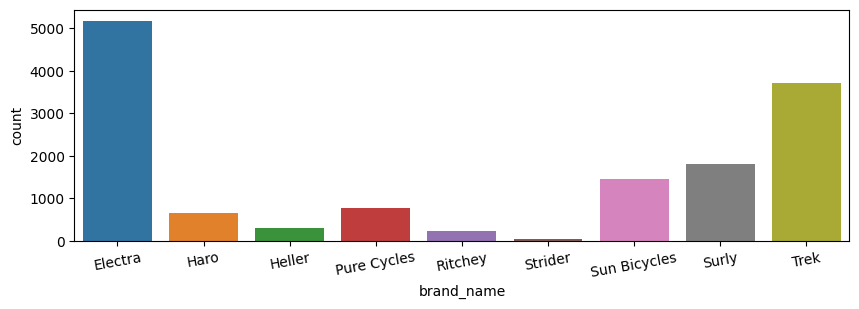

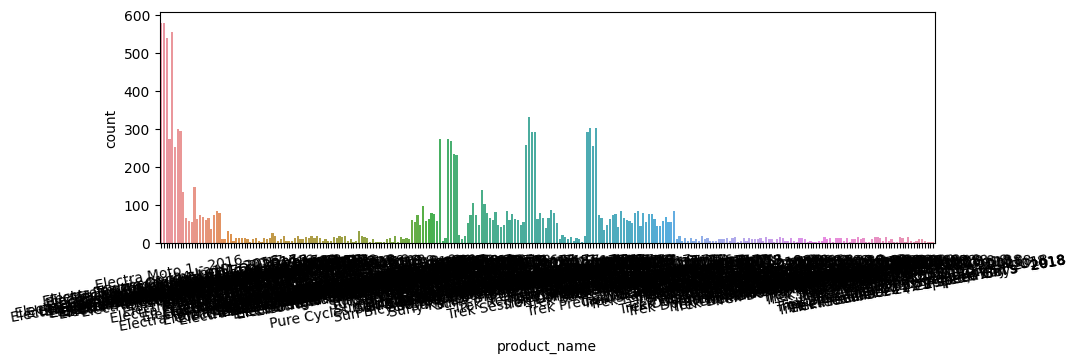

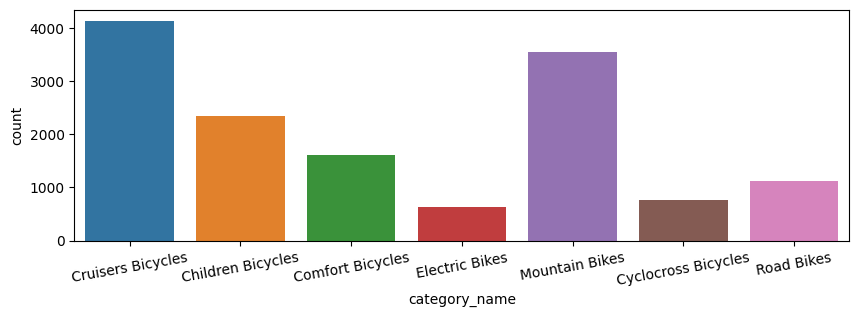

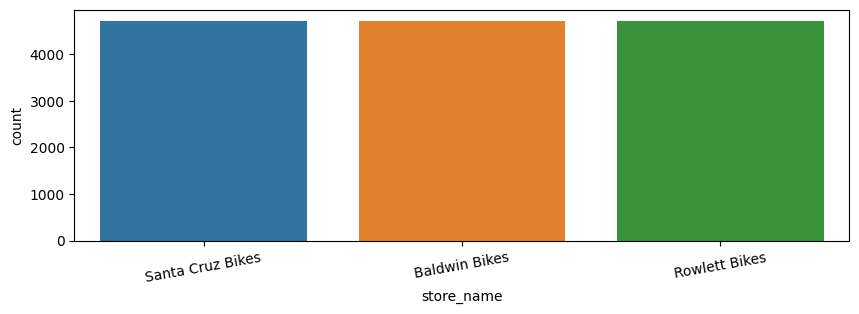

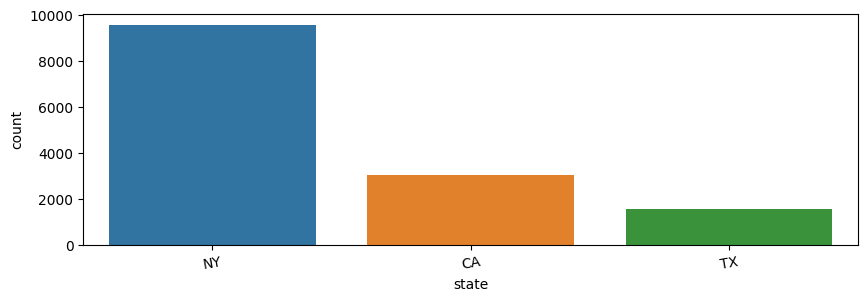

In [22]:
#Univarient Analysis for the category columns :

for col in category_column:
    plt.figure(figsize = (10,3))
    plt.subplot(1,1,1)
    sns.countplot(x = col, data = df)
    plt.xticks(rotation = 10)

In [23]:
# Insights :

# - New York has the most sales happening 
# - Elentra and Trek are the to brands which have the heighest sales

In [24]:
# Converting the skwed data through log transformation : 

def log_transform(data, col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname+'_log'] = np.log(data[colname]+1)
        else : 
            data[colname+'_log'] = np.log(data[colname])
    data.info()

In [25]:
log_transform(df, ['list_price','Price', 'Selling Price'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14160 entries, 0 to 14159
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   brand_name         14160 non-null  object        
 1   product_name       14160 non-null  object        
 2   list_price         14160 non-null  float64       
 3   category_name      14160 non-null  object        
 4   store_name         14160 non-null  object        
 5   order_id           14160 non-null  int64         
 6   quantity           14160 non-null  int64         
 7   discount           14160 non-null  float64       
 8   customer_id        14160 non-null  int64         
 9   order_status       14160 non-null  int64         
 10  order_date         14160 non-null  datetime64[ns]
 11  required_date      14160 non-null  datetime64[ns]
 12  shipped_date       12642 non-null  datetime64[ns]
 13  state              14160 non-null  object        
 14  order_

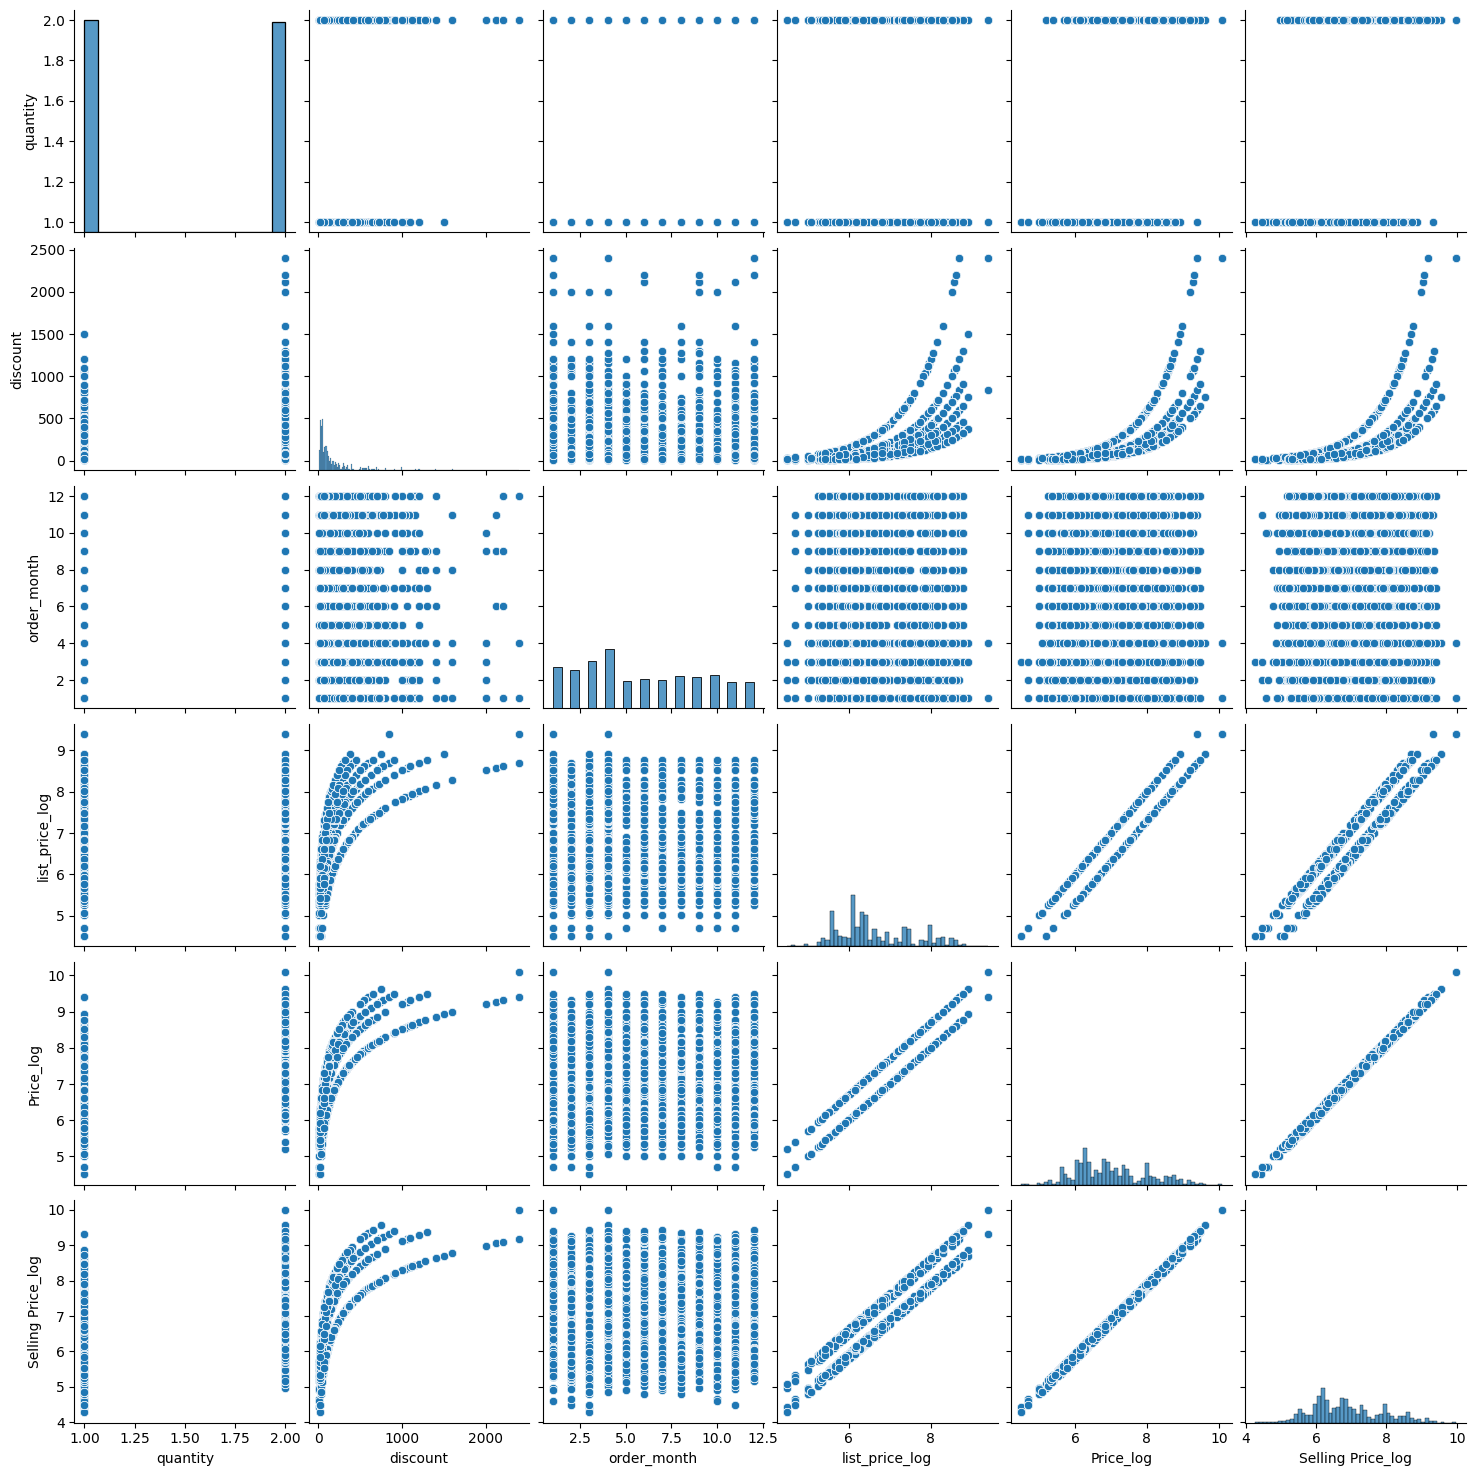

In [26]:
# Bivarient Analysis for the numerical data:

sns.pairplot(data = df.drop(
['order_id','customer_id','order_status','required_date','shipped_date',
 'required_month','shipped_month','actual_time','required_time','diff_of_time', 'Price','Selling Price','list_price'],
axis = 1))
plt.show()

In [27]:
# Insights : 

# - As price increase discount also increase, but later the rate to increase reduces

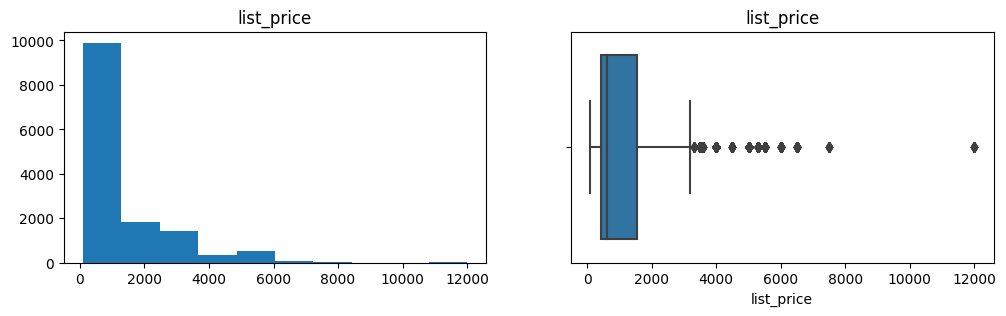

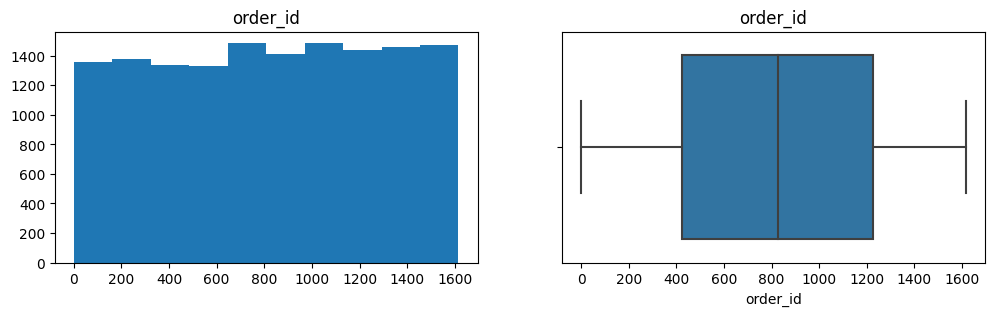

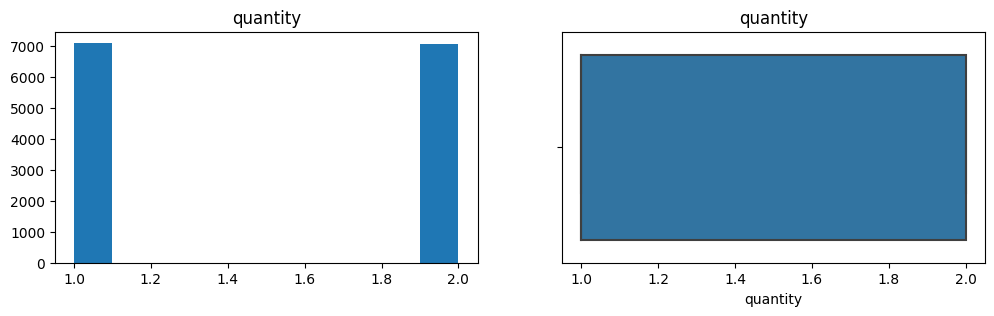

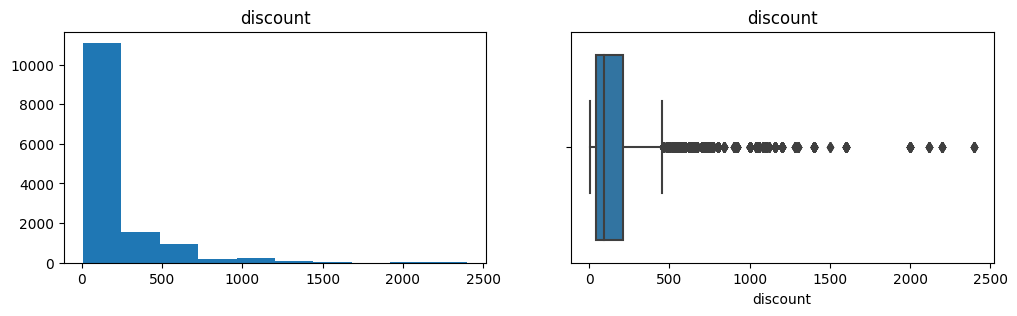

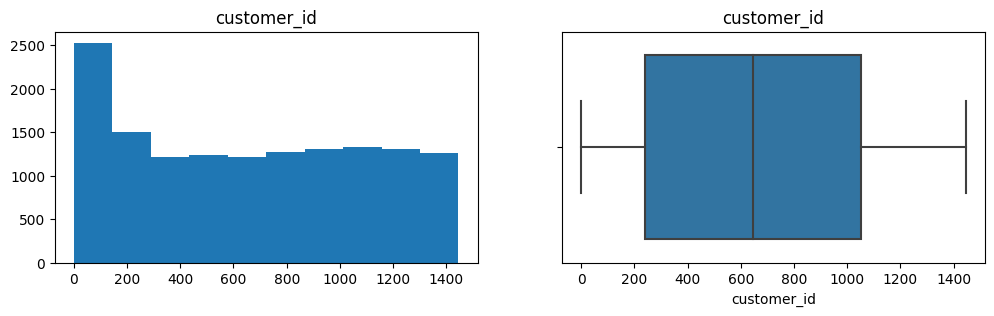

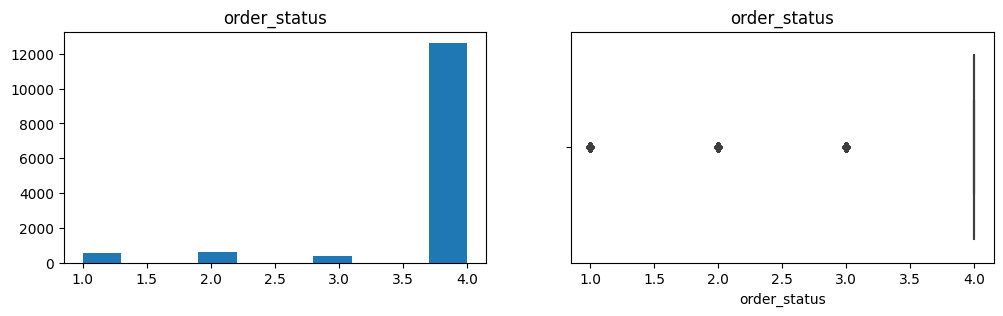

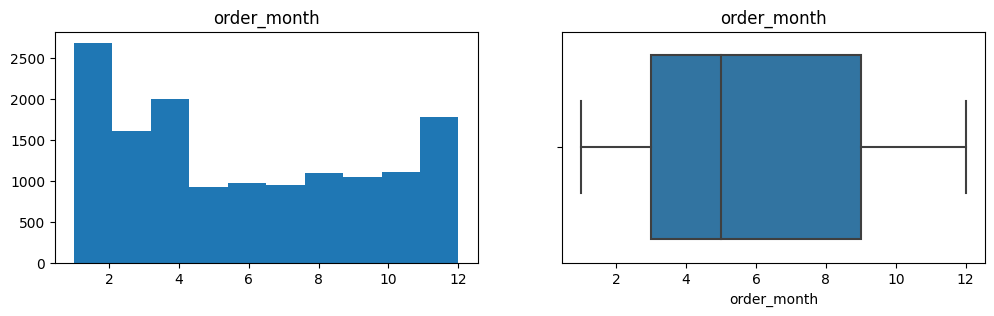

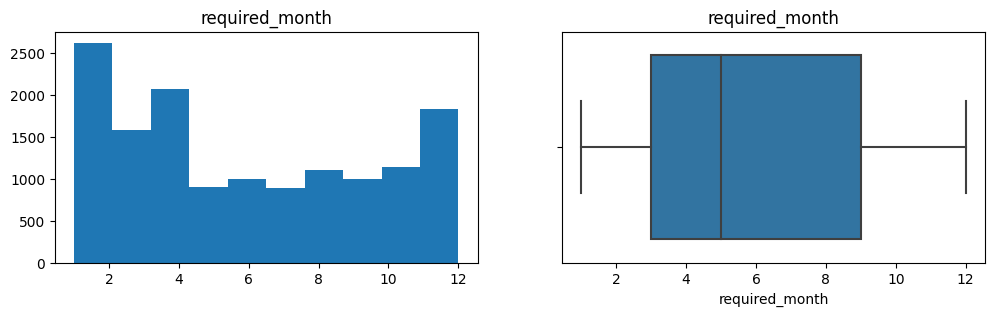

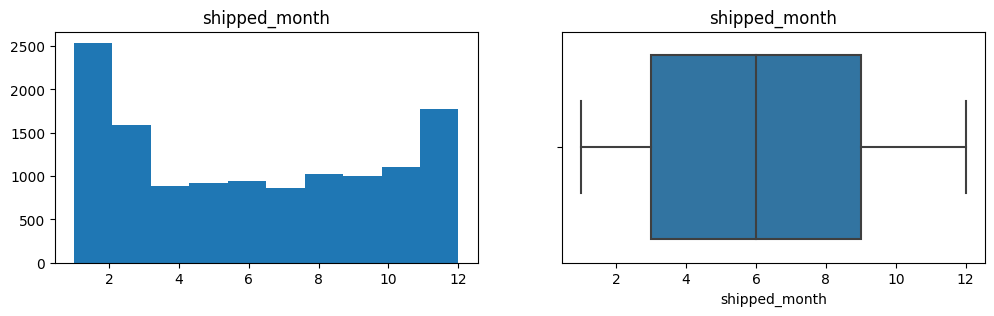

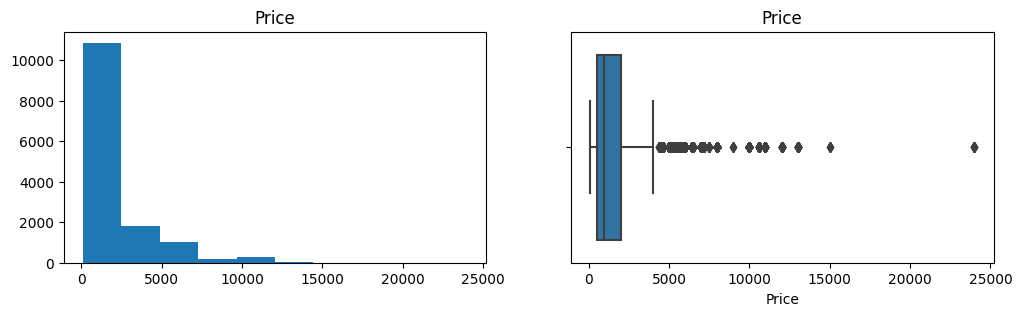

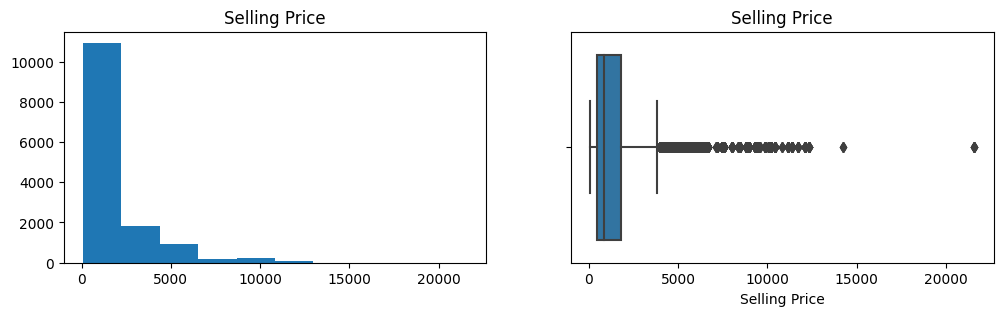

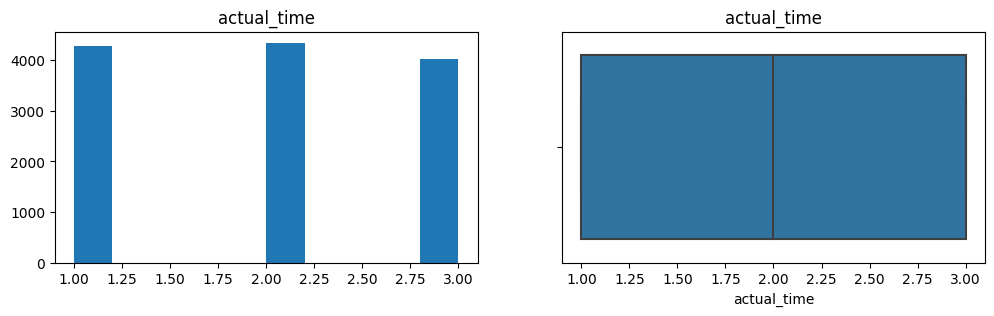

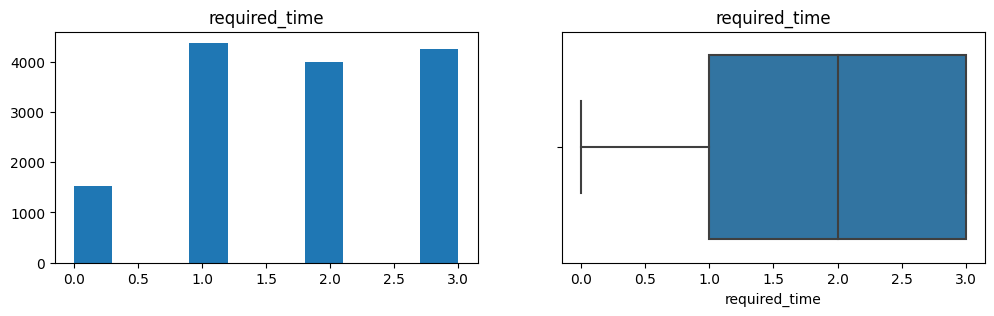

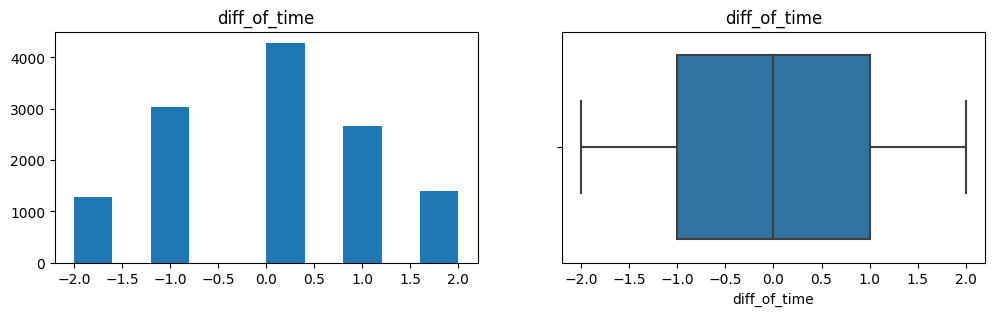

In [28]:
# Univarient analysis for the number_column:

for col in number_column:
    plt.figure(figsize= (12,3))
    plt.subplot(1,2,1)
    df[col].hist(grid=False)
    plt.title(col)
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

  <h4 style="text-align: left;color:darkblue; ">Bivariate Analysis
     <a id="2.3"></a>

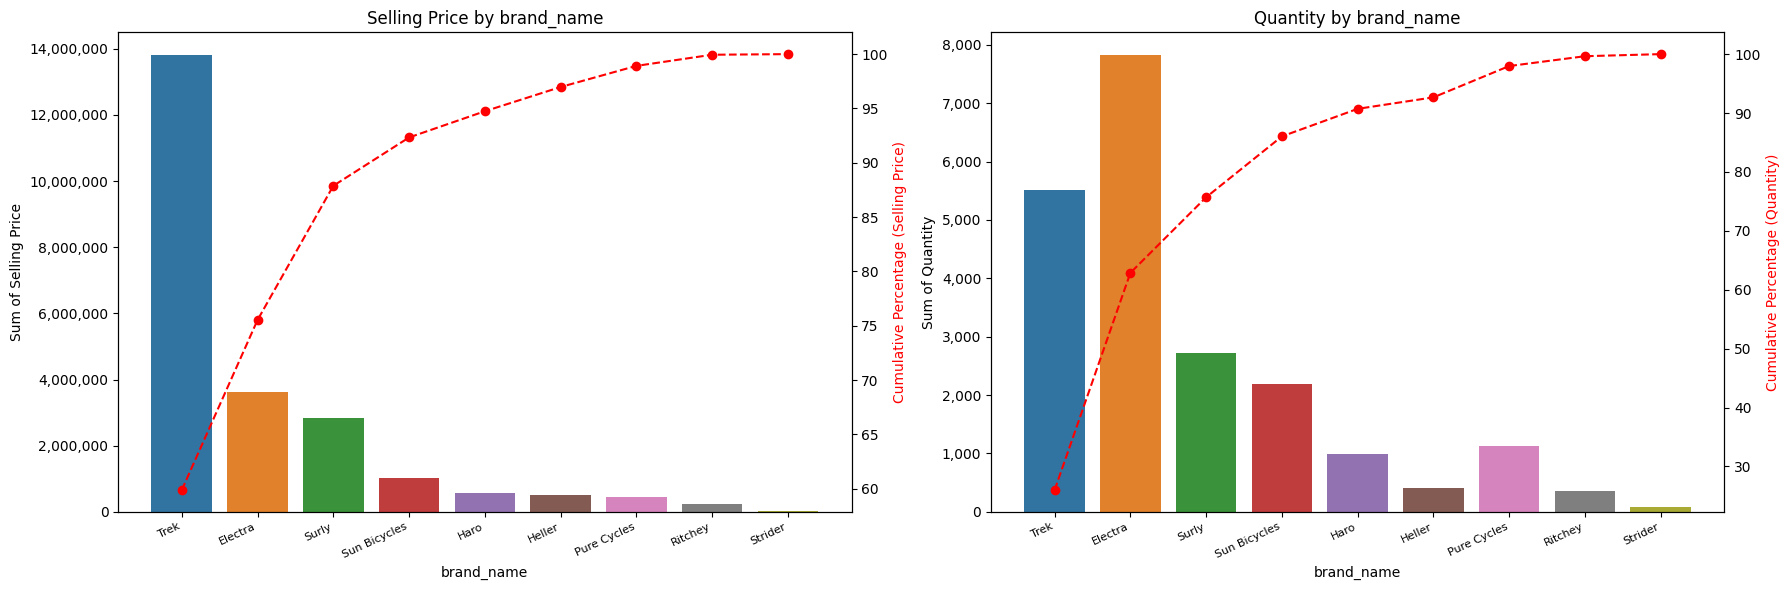

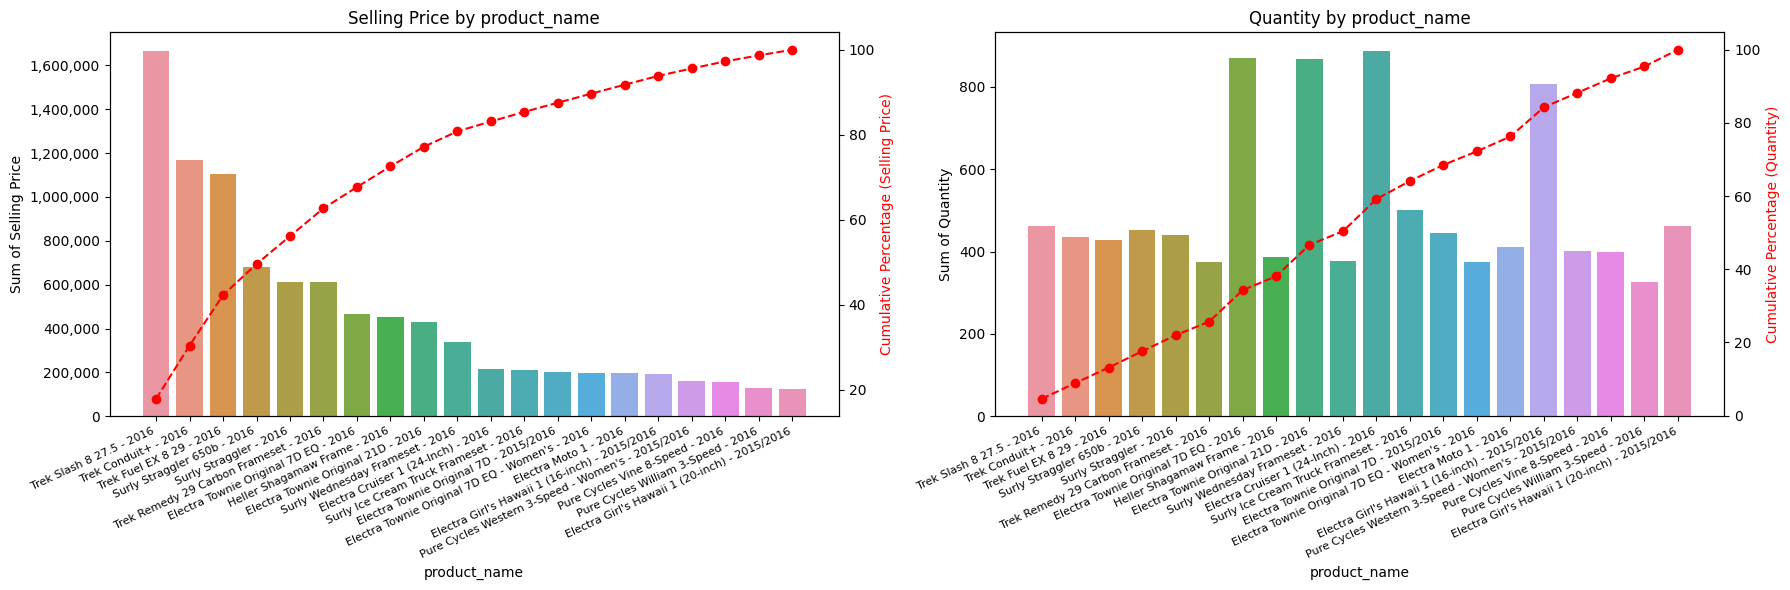

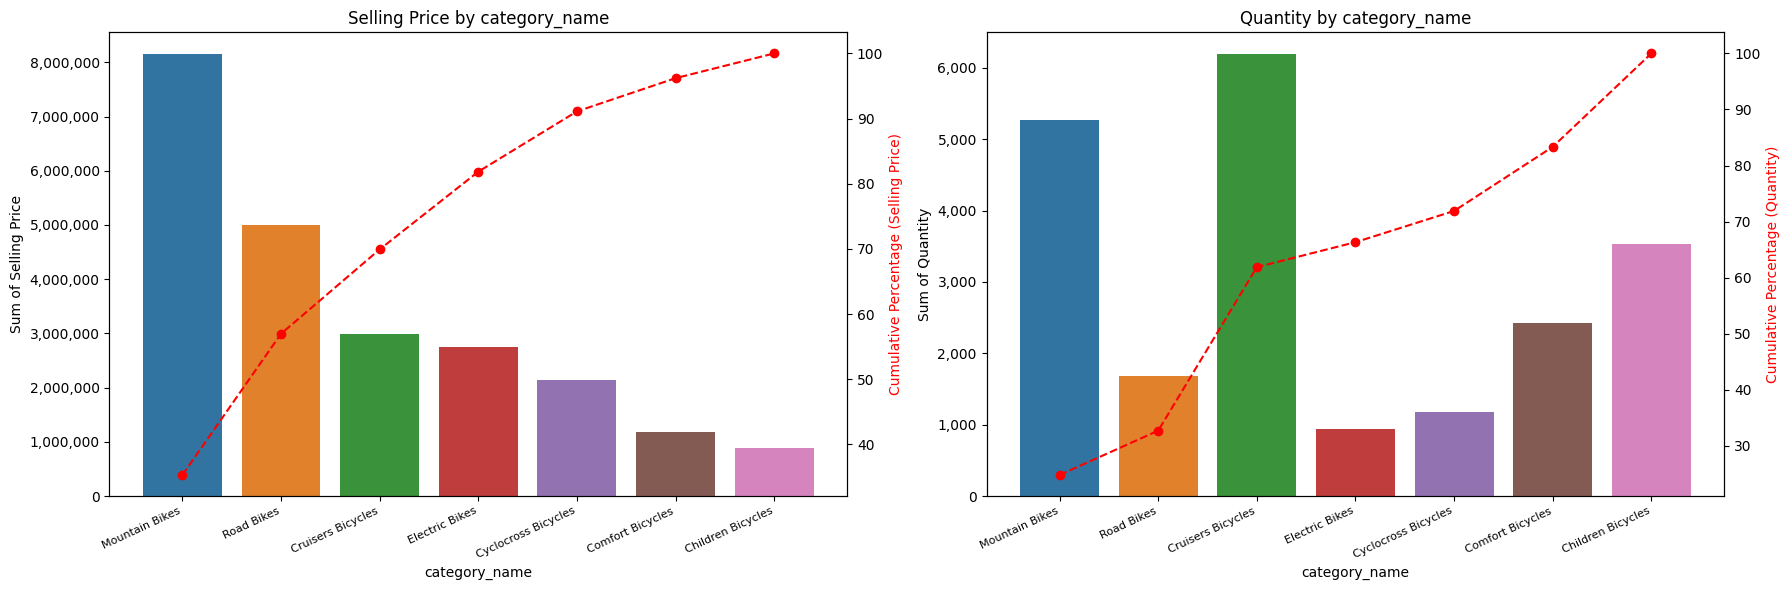

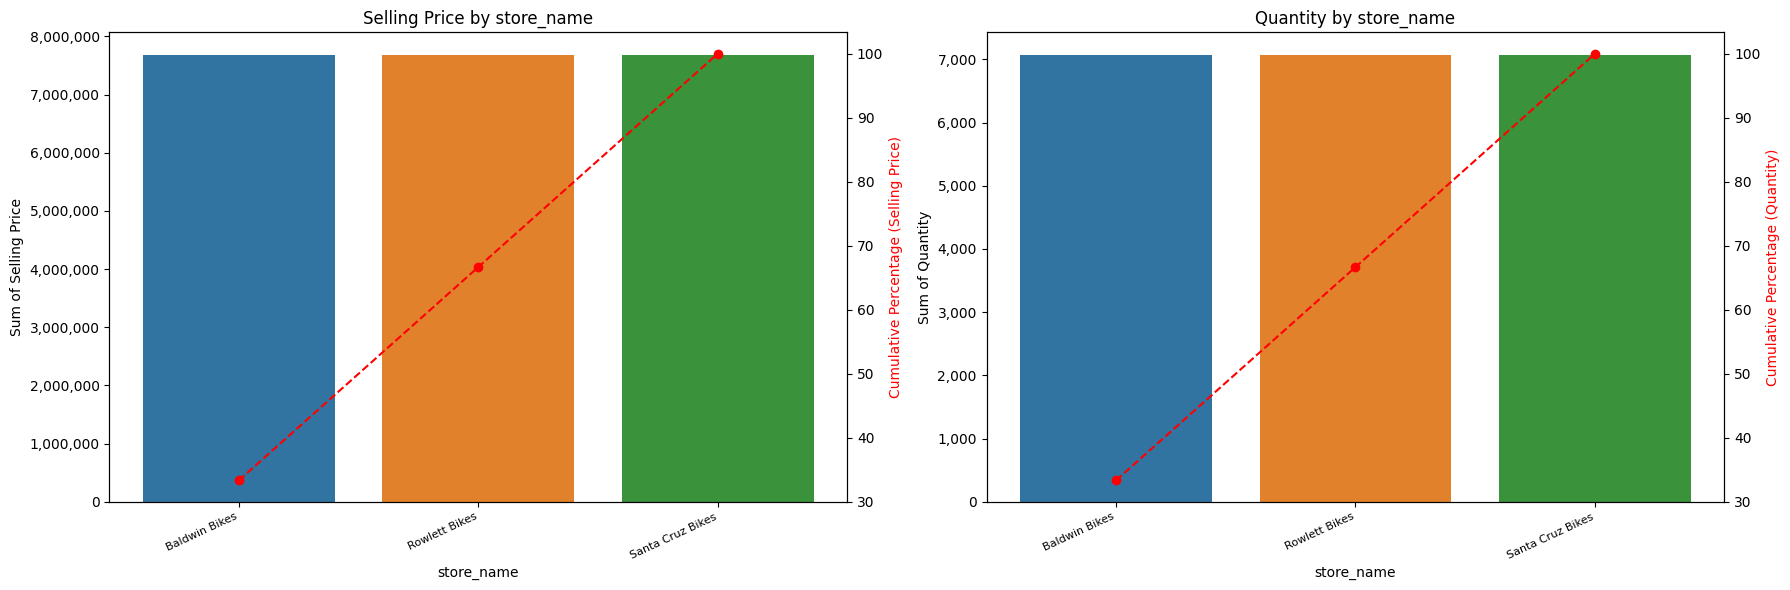

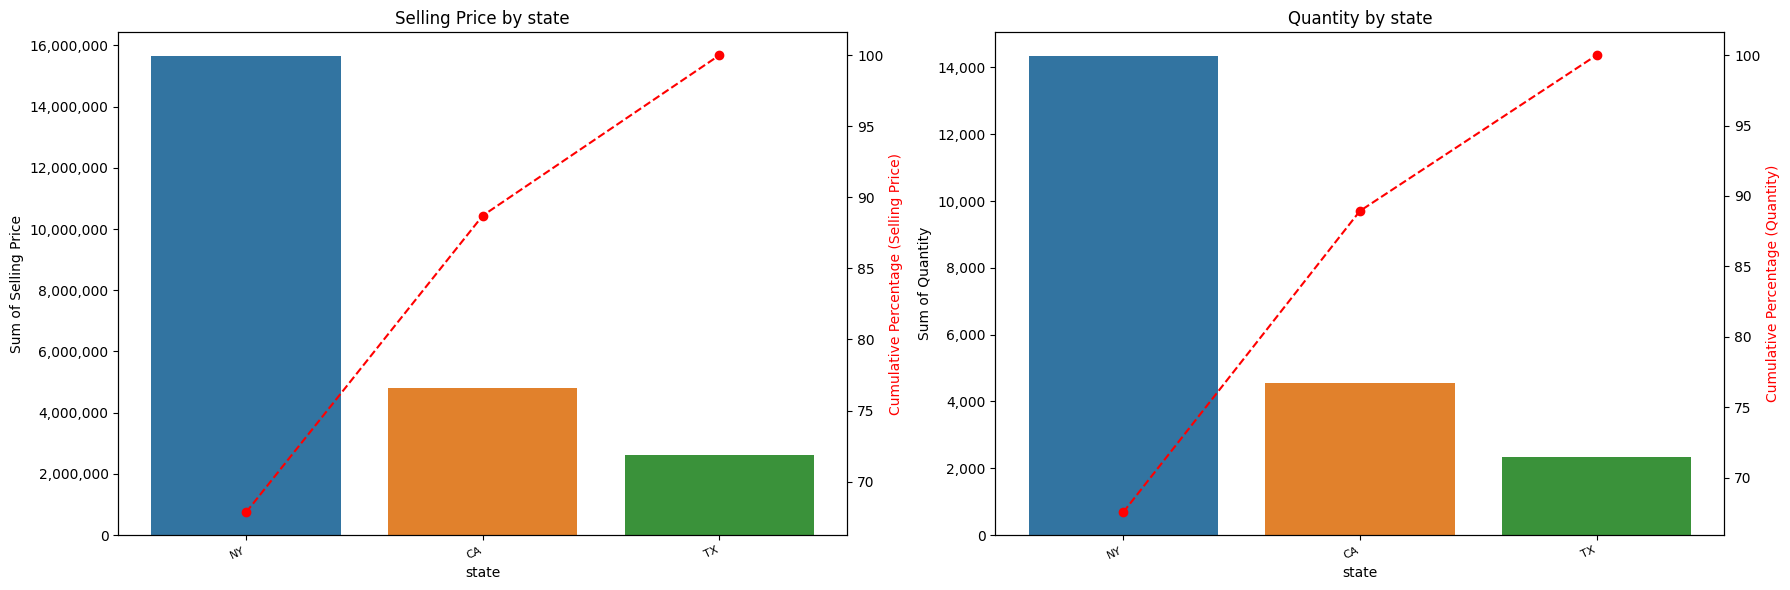

In [29]:
# Pireto chart analysis for category and numerical data :

import matplotlib.ticker as ticker  # Import ticker for formatting the y-axis

# Loop through each categorical column for plotting
for col in category_column:
    plt.figure(figsize=(18, 6))  # Larger figure to fit both Pareto charts

    # For 'city' and 'product_name', filter to only the top 20 most frequent values
    if col in ['city', 'product_name']:
        top_20 = df[col].value_counts().nlargest(20).index
        filtered_df = df[df[col].isin(top_20)]
    else:
        filtered_df = df

    # Group by the categorical column and calculate the sum of 'Selling Price' and 'quantity'
    grouped_df = filtered_df.groupby(col)[['Selling Price', 'quantity']].sum().reset_index()

    # Sort by 'Selling Price' in descending order for consistent order
    grouped_df = grouped_df.sort_values(by='Selling Price', ascending=False)

    # Plot 1: Pareto chart for 'Selling Price'
    ax1 = plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    sns.barplot(x=col, y='Selling Price', data=grouped_df, ax=ax1, order=grouped_df[col])

    # Rotate x labels and reduce font size
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=25, ha='right', fontsize=8)

    # Format y-axis to remove scientific notation for 'Selling Price'
    ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
    ax1.set_ylabel('Sum of Selling Price')
    ax1.set_title(f'Selling Price by {col}')

    # Cumulative percentage line for 'Selling Price'
    ax1b = ax1.twinx()
    cumulative_percentage_sp = grouped_df['Selling Price'].cumsum() / grouped_df['Selling Price'].sum() * 100
    ax1b.plot(grouped_df[col], cumulative_percentage_sp, color="r", marker="o", linestyle="--")
    ax1b.set_ylabel('Cumulative Percentage (Selling Price)', color='r')
    
    # Plot 2: Pareto chart for 'quantity'
    ax2 = plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    sns.barplot(x=col, y='quantity', data=grouped_df, ax=ax2, order=grouped_df[col])

    # Rotate x labels and reduce font size
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=25, ha='right', fontsize=8)

    # Format y-axis to remove scientific notation for 'quantity'
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
    ax2.set_ylabel('Sum of Quantity')
    ax2.set_title(f'Quantity by {col}')

    # Cumulative percentage line for 'quantity'
    ax2b = ax2.twinx()
    cumulative_percentage_qty = grouped_df['quantity'].cumsum() / grouped_df['quantity'].sum() * 100
    ax2b.plot(grouped_df[col], cumulative_percentage_qty, color="r", marker="o", linestyle="--")
    ax2b.set_ylabel('Cumulative Percentage (Quantity)', color='r')

    # Tight layout for better spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

In [30]:
# Insights :

# - Trek and Elentra have the heighest sales (revenue wise upto 75%, and quantity wise upto 50%, among the top 20 brands)
# - Mountain and Road Bike have the heighest sales( revenue wise upto 50%, among the top 20 categories)
# - Cruisers bike & Mountain bike  have the heigest quantity sale (quantity wise upto 50%, among the top 20 categories)
# - Which also means Road Bike are more expensive than Cruisers Bike

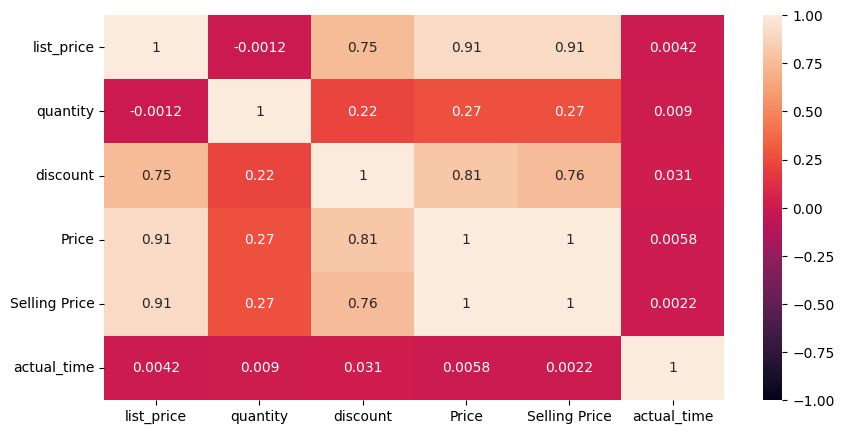

In [31]:
# Heat map to understand the coorelation between the numerical data :

plt.figure(figsize = (10,5))
sns.heatmap(df.select_dtypes(include = np.number).drop(columns = 
['order_id','customer_id','order_status','order_month','required_month','diff_of_time',
'shipped_month','required_time','list_price_log','Selling Price_log','Price_log']).corr(), annot = True, vmin = -1, vmax =1)
plt.show()

In [32]:
df.head(1)
# print(df.columns)

,brand_name,product_name,list_price,category_name,store_name,order_id,quantity,discount,customer_id,order_status,...,required_month,shipped_month,Price,Selling Price,actual_time,required_time,diff_of_time,list_price_log,Price_log,Selling Price_log
0,Electra,Electra Townie Original 21D - 2016,549.99,Cruisers Bicycles,Santa Cruz Bikes,6,2,54.999,94,4,...,1,1.0,1099.98,1044.981,1.0,3,-2.0,6.3099,7.003047,6.951754


  <h4 style="text-align: left;color:darkblue; ">RFM Score Analysis
     <a id="2.3"></a>

In [33]:
# Setting required tables to the data base for the SQL quries :

order_items.to_sql('order_items', db, if_exists = 'replace', index=False)
orders.to_sql('orders', db, if_exists = 'replace', index=False)

1615

In [34]:
# Joining and converting the table to an order_level_data :
q1= """
SELECT
customer_id, order_id, order_date, (quantity*list_price) as 'Order_values'
FROM order_items
JOIN orders USING(order_id)
JOIN customers USING(customer_id)
GROUP BY 1,2,3
"""
order_level =  pd.read_sql_query(q1, db)
order_level.head()

,customer_id,order_id,order_date,Order_values
0,1,599,2016-12-09,5999.98
1,1,1555,2018-04-18,1099.98
2,1,1613,2018-11-18,4999.99
3,2,692,2017-02-05,2599.99
4,2,1084,2017-08-21,999.99


In [35]:
# Storing order_level table to the database for sql operations :
order_level.to_sql('order_level', db, if_exists = 'replace', index = False)

1615

In [36]:
# Converting the table to user_level
q1= """
SELECT
customer_id, 
DATE(MAX(order_date)) AS last_purchase_date,
DATE(MIN(order_date)) AS first_purchase_date,
COUNT(DISTINCT order_id) AS order_count,
SUM(Order_values) AS monetory
FROM order_level
GROUP BY 1
"""
user_level =  pd.read_sql_query(q1, db)
user_level.head()

# Storing user_level table to the database :
user_level.to_sql('user_level', db, if_exists = 'replace', index = False)

1445

In [37]:
# RFM_scores customer_wise :

q1= """
WITH LAST_DATE AS (
  SELECT MAX(last_purchase_date) AS REF_DATE
  FROM user_level
)
SELECT
  customer_id,
  CAST(julianday(REF_DATE) - julianday(last_purchase_date) AS INTEGER) AS Recency,
  monetory, 
  order_count / (
    (strftime('%Y', last_purchase_date) - strftime('%Y', first_purchase_date)) * 12 + 
    (strftime('%m', last_purchase_date) - strftime('%m', first_purchase_date))+1
  ) AS Frequency
FROM user_level
CROSS JOIN LAST_DATE
"""
RFM_scores =  pd.read_sql_query(q1, db)
RFM_scores.head(3)

# Storing RFM table to the database :
RFM_scores.to_sql('RFM_scores', db, if_exists = 'replace', index = False)

1445

In [38]:
#  Converting RFM to Recency(R) and Frequency and Monetory(FM) columns :

q1= """
WITH approx_scores AS(
SELECT
customer_id, Recency,
ntile(5) OVER(ORDER BY Recency DESC) AS r_bucket, Frequency,
ntile(5) OVER(ORDER BY Frequency) AS f_bucket, monetory,
ntile(5) OVER(ORDER BY monetory) AS m_bucket
FROM RFM_scores)
SELECT
customer_id,
r_bucket as r_score, 
ROUND((f_bucket + m_bucket)/2,0) as fm_score
FROM approx_scores
"""
RFM_val =  pd.read_sql_query(q1, db)
RFM_val.head(3)

,customer_id,r_score,fm_score
0,259,1,2.0
1,1212,1,2.0
2,523,1,3.0


In [39]:
RFM_val.to_sql('RFM_val', db, if_exists = 'replace', index = False)

1445

In [40]:
# Setting the RFM segment :

q1= """
SELECT
customer_id,
r_score, 
fm_score,
CASE
    WHEN (r_score = 5 AND fm_score = 5) 
      OR (r_score = 5 AND fm_score = 4)
      OR (r_score = 4 AND fm_score = 5)
    THEN 'Champion'
    WHEN (r_score = 5 AND fm_score = 3) 
      OR (r_score = 4 AND fm_score = 4)
      OR (r_score = 3 AND fm_score = 5)
      OR (r_score = 3 AND fm_score = 4)
    THEN 'Loyal customer'  
    WHEN (r_score = 5 AND fm_score = 2) 
      OR (r_score = 4 AND fm_score = 2)
      OR (r_score = 3 AND fm_score = 3)
      OR (r_score = 4 AND fm_score = 3)
    THEN 'Potential Loyalist'  
    WHEN r_score = 5 AND fm_score = 1 
    THEN 'Recent Customer'
    WHEN (r_score = 4 AND fm_score = 1) 
      OR (r_score = 3 AND fm_score = 1)
    THEN 'Promising'
    WHEN (r_score = 3 AND fm_score = 2) 
      OR (r_score = 2 AND fm_score = 3)
      OR (r_score = 2 AND fm_score = 2)
    THEN 'Customer need attention'
    WHEN r_score = 2 AND fm_score = 1 
    THEN 'About to sleep'
    WHEN (r_score = 2 AND fm_score = 5) 
      OR (r_score = 2 AND fm_score = 4)
      OR (r_score = 1 AND fm_score = 3)
    THEN 'At risk'
    WHEN (r_score = 1 AND fm_score = 5)
      OR (r_score = 1 AND fm_score = 4)
    THEN 'Cant loose them'
    WHEN r_score = 1 AND fm_score = 2 
    THEN 'Hibernating'
    WHEN r_score = 1 AND fm_score = 1 
    THEN 'Lost'
END AS rfm_segment
FROM RFM_val
ORDER BY Customer_id
"""
RFM_val =  pd.read_sql_query(q1, db)
RFM_val.head(3)

,customer_id,r_score,fm_score,rfm_segment
0,1,5,3.0,Loyal customer
1,2,5,3.0,Loyal customer
2,3,5,2.0,Potential Loyalist


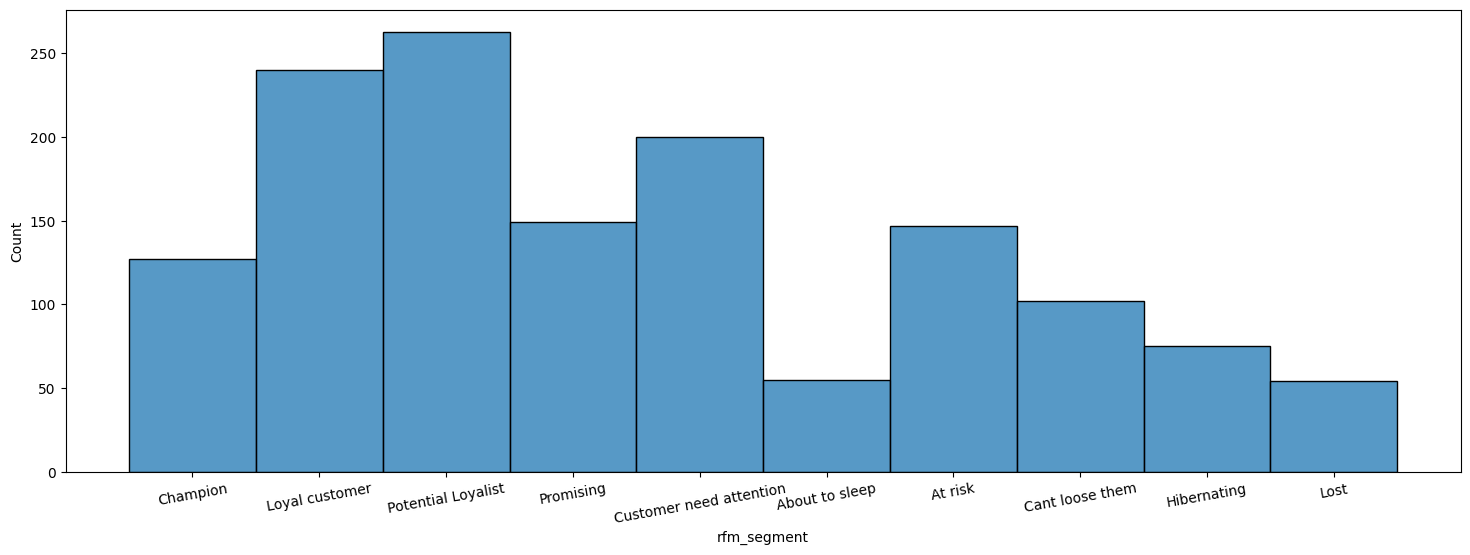

In [41]:
# Bifercation according according to the RFM sefgment :

# Define the custom order for the segments
order = ['Champion', 'Loyal customer', 'Potential Loyalist', 'Promising','Customer need attention', 'About to sleep',
         'At risk', 'Cant loose them', 'Hibernating', 'Lost']

# Convert 'rfm_segment' to a categorical type with the specified order
RFM_val['rfm_segment'] = pd.Categorical(RFM_val['rfm_segment'], categories=order, ordered=True)

# Plot the histogram with the specified order
plt.figure(figsize=(18, 6))  
sns.histplot(RFM_val['rfm_segment'], discrete=True)
plt.xticks(rotation=10)

plt.show()


  <h2 style="text-align: left;color:darkblue; ">Hypothesis
     <a id="2.3"></a>

Analysing the Time Difference

In [42]:
from scipy.stats import ttest_ind

# H0: There is no significant difference between actual_time and required_time
# H1: There is a significant difference between actual_time and required_time
# alpha: .05

# Drop rows with missing values in actual_time or required_time, calculating only on the delivered orders 
df_clean = df.dropna(subset=['actual_time', 'required_time'])

# Perform the t-test
t_score, pval = ttest_ind(df_clean['actual_time'], df_clean['required_time'])

# Hypothesis testing based on p-value
if pval > .05:
    print('pval :', pval, "We fail to reject Null Hypothesis, no significant difference between actual_time and required_time")
else:
    print('pval :', pval, "We reject Null Hypothesis, a significant difference between actual_time and required_time")


pval : 0.2994945041042051 We fail to reject Null Hypothesis, no significant difference between actual_time and required_time


**Testing for Anova Assumptions :**
* Shapiro test to test NNormality
*Levene test to test The variances between the groups are equal or not
* Data points are all Independent.o

In [43]:
# Seperating the sales as per states :

ny_sales = df[df['state'] == 'NY']['Selling Price']
ca_sales = df[df['state'] == 'CA']['Selling Price']
tx_sales = df[df['state'] == 'TX']['Selling Price']

In [44]:
from scipy.stats import shapiro # Test Gaussian 
# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat_a, p_value_a = shapiro(ny_sales)
test_stat_b, p_value_b = shapiro(ca_sales)
test_stat_c, p_value_c = shapiro(tx_sales)
print('ny_sales', test_stat_a, p_value_a)
print('ca_sales', test_stat_b, p_value_b)
print('tx_sales', test_stat_c, p_value_c)

ny_sales 0.6600732248351548 2.2300430056367155e-87
ca_sales 0.7082342936967355 2.8432950868713356e-58
tx_sales 0.6638823810186076 4.100492098125321e-48


In [45]:
from scipy.stats import levene # Test variance
# H0: The variances between the groups are equal
# Ha: The variances between the groups are different

levene_stat, p_value = levene(ny_sales, ca_sales, tx_sales)
levene_stat, p_value

(0.9380043144524077, 0.3914325085685716)

In [46]:
# Though data pass the assumptions on variance and independance but failed on the assumption of 
# normal distribution(Gaussian) we use kruskal instead of Anova

from scipy.stats import kruskal 
# H0: Medians of all group are same 
# H1 : Atlest 1 medians is different
stat, p_value = kruskal(ny_sales, ca_sales, tx_sales)

if p_value < 0.05:
    print(f"p-value: {p_value}, Medians sales of all states are same .")
else:
    print(f"p-value: {p_value}, Medians sales of atleast one states is different.")

p-value: 0.7641124658968222, Medians sales of atleast one states is different.


In [47]:
# Analysing the sales as per states :

ny_sales = df[df['state'] == 'NY']['Selling Price']
ca_tx_sales = df[df['state'].isin(['CA', 'TX'])]['Selling Price']  # Combine CA and TX sales

# Apply log transformation to the sales data
ny_sales_log = np.log(ny_sales)
ca_tx_sales_log = np.log(ca_tx_sales)

# Perform the two-sample t-test on the log-transformed data (one-sided, right-tailed)
t_stat, p_val = ttest_ind(ny_sales_log, ca_tx_sales_log, alternative='greater')

# Interpret the p-value
if p_val < 0.05:
    print(f"p-value: {p_val}, Reject the null hypothesis. NY salesz are significantly greater than CA and TX combined.")
else:
    print(f"p-value: {p_val}, Fail to reject the null hypothesis. NY sales are not significantly greater than CA and TX combined.")

p-value: 0.678142690530602, Fail to reject the null hypothesis. NY sales are not significantly greater than CA and TX combined.
